In [13]:
%reset -f
import os
import requests

# フォルダが存在しなければ作成
dir = 'data/download/'
if not os.path.isdir(dir):
  os.makedirs(dir)

fn = 'char-chip-01.png'
url = 'http://dispell.net/th/char_th0012.png'
res = requests.get(url)

if res.status_code != 200:
  raise Exception(f'ファイル {url} の取得に失敗。強制終了します。Code:{res.status_code}')
else :
  with open(f'{dir}/{fn}','wb') as file: 
    file.write(res.content)
  print(f'{dir} に {fn} を保存しました')

data/download/ に char-chip-01.png を保存しました


In [42]:
%reset -f
import os
import requests

# フォルダが存在しなければ作成
dir = 'data/download/'
if not os.path.isdir(dir):
  os.makedirs(dir)

fn = 'char-chip-02.png'
url = 'http://dispell.net/img/v4_yukkuri.png'
res = requests.get(url)

if res.status_code != 200:
  raise Exception(f'ファイル {url} の取得に失敗。強制終了します。Code:{res.status_code}')
else :
  with open(f'{dir}/{fn}','wb') as file: 
    file.write(res.content)
  print(f'{dir} に {fn} を保存しました')

data/download/ に char-chip-02.png を保存しました


横 288 px , 縦 256 px


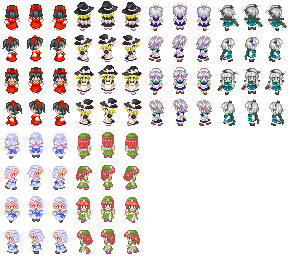

In [15]:
%reset -f
import cv2
from IPython.display import Image

path = 'data/download/' + 'char-chip-01.png'
img = cv2.imread(path)
if img is None:
  raise ValueError(f'Failed to load image: {path}')
height, width, _ = img.shape  # アンパック
print(f'横 {width} px , 縦 {height} px')
Image(open(path,'rb').read())

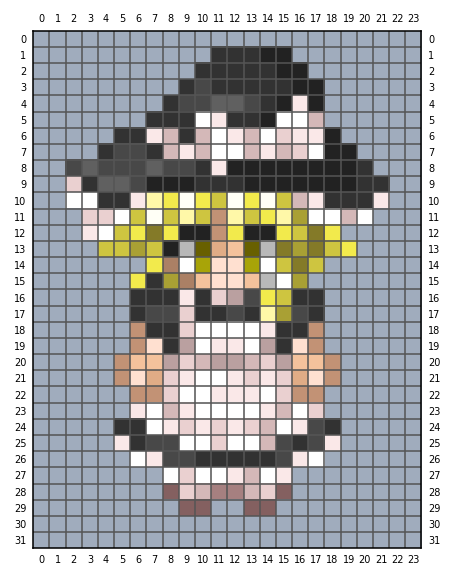

In [ ]:
%reset -f
import cv2
import numpy as np
import matplotlib.pyplot as plt

dir = 'data/download/'
fn = 'char-chip-01.png'
path = dir + fn
raw = cv2.imread(path) # 生画像 (Raw Image) の読込み
if raw is None:
  raise ValueError(f'Failed to load image: {path}')

# --- 演習: ここから改良 ---
# 1コマのサイズを定義
chip_w = 24
chip_h = 32

# 任意の「横位置」と「縦位置」をゼロオリジンで指定
target_col = 4  # 横位置 (0, 1, 2, 3, 4...)
target_row = 2  # 縦位置 (0, 1, 2, 3, 4...)

# 指定した位置からスライス範囲（開始点と終了点）を計算
y_start = target_row * chip_h
y_end   = y_start + chip_h
x_start = target_col * chip_w
x_end   = x_start + chip_w

# 計算した変数を使ってスライス
img = raw[y_start:y_end, x_start:x_end] 

height, width, _ = img.shape

# 可視化に関する処理
fig,ax = plt.subplots(dpi=140)
ax.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB),interpolation='nearest')
ax.set_xlim(-0.5,width-0.5)
ax.set_ylim(height-0.5,-0.5)

# 主目盛の設定
plt.tick_params(length=0, labeltop=True, labelright=True )
ax.set_xticks(np.arange(0, width))
ax.set_xticklabels(np.arange(0, width),fontsize=5)
ax.set_yticks(np.arange(0, height))
ax.set_yticklabels(np.arange(0, height),fontsize=5)

# 副主目盛の設定
plt.tick_params(which='minor', 
                length=0, labeltop=True, labelright=True )
ax.set_xticks(np.arange(0.5, width-0.5,1), minor=True)
ax.set_yticks(np.arange(0.5, height-0.5,1), minor=True)

# グリッド設定と表示
ax.grid(which='minor', color='#555')
plt.show()

raw.shape => (256, 288, 4)
data/img/marisa.png に画像を出力しました。


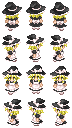

In [40]:
%reset -f
import os
import cv2
import numpy as np
from IPython.display import Image

# 入力画像のパス設定 (Path設定)
input_path = 'data/download/' + 'char-chip-01.png'

# 出力画像のパス設定 (Path設定)
output_fn = 'marisa.png'
output_dir = 'data/img/'
output_path = output_dir + output_fn

# 出力フォルダが存在しなければ作成
if not os.path.isdir(output_dir):
  os.makedirs(output_dir)

# 画像読込み、切り出し範囲の設定
img = cv2.imread(input_path,cv2.IMREAD_UNCHANGED) # アルファチャンネルも読み込む
if img is None:
  raise ValueError(f'Failed to load image: {input_path}')
print(f'raw.shape => {img.shape}')
bw = 24  # BaseWidth 
bh = 32  # BaseHeight
offset_w = bw*3
offset_h = bh*0

# 画像の切り出しと保存処理
img = img[offset_h:offset_h+bh*4, offset_w:offset_w+bw*3]
cv2.imwrite(output_path,img)
print(f'{output_path} に画像を出力しました。')

# 出力画像の確認
Image(open(output_path,'rb').read())

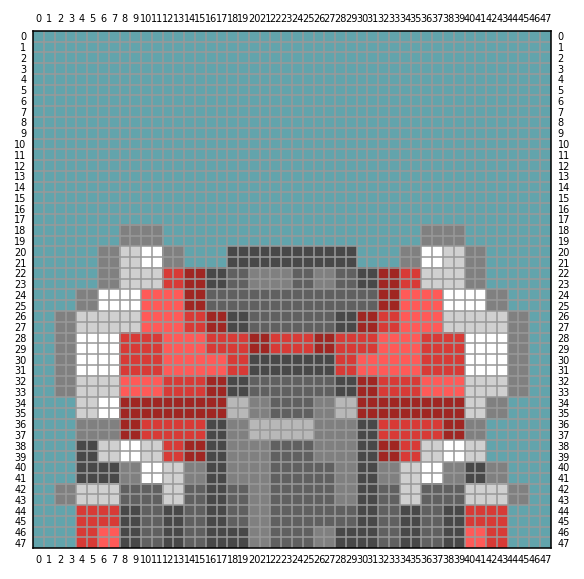

Saved: data/img/reimu-face.png


In [47]:
# 画像の詳細確認
%reset -f
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 入力画像のパス設定
input_dir = 'data/download/'
input_fn = 'char-chip-02.png'
input_path = input_dir + input_fn

# 出力画像のパス設定
output_dir = 'data/img/'
output_fn = 'reimu-face.png' # 保存名を霊夢用に変更
output_path = output_dir + output_fn

# アルファチャンネルを含めて画像読込み
raw = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)
if raw is None:
    raise ValueError(f'Failed to load image: {input_path}')

# --- 演習: ゼロオリジンでの位置指定と中心調整 ---

# 1. 1チップあたりの基本サイズ
# char-chip-02.png は 24x24 のグリッドで構成されています
chip_w = 24  
chip_h = 24

# 2. 抜き出したい「横位置」と「縦位置」（0, 1, 2...）
# 霊夢の正面顔なら 0, 0
target_col = 0
target_row = 0

# 3. 【中心調整】
# 上の余白を消して顔を上に寄せるには、offset_y を調整します。
# 霊夢が下にズレているなら数値を「プラス」にします。
offset_x = 0  
offset_y = 0  # 余白がある場合は 2 や 4 に変更してみてください

# 4. 指定した位置からスライス範囲を自動計算
y_start = target_row * chip_h + offset_y
y_end   = y_start + 24
x_start = target_col * chip_w + offset_x
x_end   = x_start + 24

# 計算した変数を使って画像を切り出し
# img = raw[...] の形式を維持して切り出します
img = raw[y_start:y_end, x_start:x_end] 
# ----------------------------------------------

# 【安全策】画像が空でないか確認
if img.size == 0:
    print("エラー: 切り出し範囲が画像の外側です。target_row, col を確認してください。")
else:
    # 48x48に拡大（確認しやすくするため）
    img = cv2.resize(img, (48, 48), interpolation=cv2.INTER_NEAREST)
    height, width, _ = img.shape

    # 可視化に関する処理
    fig, ax = plt.subplots(dpi=140)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), interpolation='nearest')
    ax.set_xlim(-0.5, width-0.5)
    ax.set_ylim(height-0.5, -0.5)

    # 主目盛・副目盛の設定
    plt.tick_params(length=0, labeltop=True, labelright=True)
    ax.set_xticks(np.arange(0, width))
    ax.set_xticklabels(np.arange(0, width), fontsize=5)
    ax.set_yticks(np.arange(0, height))
    ax.set_yticklabels(np.arange(0, height), fontsize=5)

    plt.tick_params(which='minor', length=0, labeltop=True, labelright=True)
    ax.set_xticks(np.arange(0.5, width-0.5, 1), minor=True)
    ax.set_yticks(np.arange(0.5, height-0.5, 1), minor=True)

    # グリッド設定と表示
    ax.grid(which='minor', color='#999')
    plt.show()

    # 保存
    cv2.imwrite(output_path, img)
    print(f'Saved: {output_path}')

横 288 px , 縦 256 px


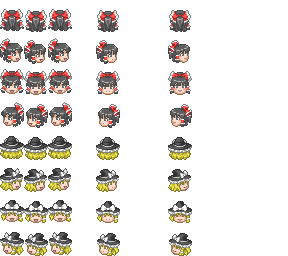

In [57]:
%reset -f
import cv2
from IPython.display import Image

path = 'data/download/' + 'char-chip-02.png'
img = cv2.imread(path)
if img is None:
  raise ValueError(f'Failed to load image: {path}')
height, width, _ = img.shape  # アンパック
print(f'横 {width} px , 縦 {height} px')
Image(open(path,'rb').read())

In [ ]:
# 演習1: マップタイルのリサイズと確認表示
%reset -f
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 1. パス設定
input_path = 'data/download/map-ground-center.png'
output_dir = 'data/img/'
output_path = output_dir + 'map-ground-center.png'

# 2. 画像の読み込み（透過情報を保持）
raw = cv2.imread(input_path, cv2.IMREAD_UNCHANGED)

if raw is None:
    print(f"エラー: {input_path} が見つかりません。")
else:
    # 3. リサイズ (500x500 -> 48x48)
    # ゲーム素材として最適な interpolation='nearest' を使用
    img_resized = cv2.resize(raw, (48, 48), interpolation=cv2.INTER_NEAREST)

    # 4. 保存処理
    os.makedirs(output_dir, exist_ok=True)
    cv2.imwrite(output_path, img_resized)
    print(f"画像を保存しました: {output_path}")

    # 5. 画像の出力（詳細確認用）
    height, width = img_resized.shape[:2]
    fig, ax = plt.subplots(dpi=120)
    
    # OpenCV(BGR/BGRA) を Matplotlib(RGB/RGBA) に変換して表示
    if img_resized.shape[2] == 4:
        ax.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGRA2RGBA))
    else:
        ax.imshow(cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB))

    # 目盛りを設定してサイズを確認しやすくする
    ax.set_xticks(np.arange(0, width, 10))
    ax.set_yticks(np.arange(0, height, 10))
    ax.set_title(f"Resized Image ({width}x{height})")
    
    plt.show()

演習1完了: data/img/map-ground-center.png を保存しました。
